# Creation of  synthetic spectroscopic-like time-series
## Oscar Barrag√°n, May 2021

In [2]:
#Imort modules
from __future__ import print_function, division, absolute_import
import numpy as np
#Import citlalatonac from pyaneti_extras, note that pyaneti has to be compiled in your machine
#and pyaneti has to be in your PYTHONPATH, e.g., you have to add in your bashrc file
#export PYTHONPATH=${PYTHONPATH}:/pathtopyaneti/pyaneti
#and replacing pathtopyaneti with the location of pyaneti in your machine
from pyaneti_extras.citlalatonac import citlali
#citlalatonac is the class that creates the spectroscopic-like time-series 

### let us summon `citlalatonac` powers and create synthetic stellar data

We will use a quasi-periodic kernel (`kernel='QPK'`)
$$
    \gamma_{i,j}^{G,G} =  \exp 
    \left(
    - \frac{\sin^2\left[\pi \left(t_i - t_j \right)/P_{\rm GP}\right]}{2 \lambda_{\rm p}^2}
    - \frac{\left(t_i - t_j\right)^2}{2\lambda_{\rm e}^2}
    \right)
$$

with hyper-parameters $$\lambda_e = 20, \lambda_p = 0.3, P_{\rm GP} = 5 $$ 

given as `kernel_parameters=[20,0.3,5]`. In this case we will create 3 timeseries between 0 (`tmin`) and 50 days (`tmax`) following

$$
    S_1 =  A_1 G(t) + B_1 \dot{G}(t), \\
    S_2 =  A_2 G(t) + B_2 \dot{G}(t), \\
    S_3 =  A_3 G(t) + B_3 \dot{G}(t),
$$

with amplitudes $A_1 = 0.005, B_1=0.05, A_2=0.05, B_2=0.0, A_3=0.005,A_4=-0.05$ (`amplitudes=[0.005,0.05,0.05,0.0,0.005,-0.05]`). In this case, `citlalatonac` knows that we want to create 3 time-series because we are passing 6 amplitudes. The last thing is to name the time-series, by default, the first one is always called `rv`, so we only need to name the last 2, `time_series=['s2','s3']`. 

We can also pas a `seed` for the random number generator.


In [3]:
#Do all the previous description with one Python command
star = citlali(tmin=0,tmax=50,kernel='QPK',kernel_parameters=[20,0.3,5],
                    amplitudes=[0.005,0.05,0.05,0.0,0.005,-0.05],time_series=['s2','s3'],seed=13)

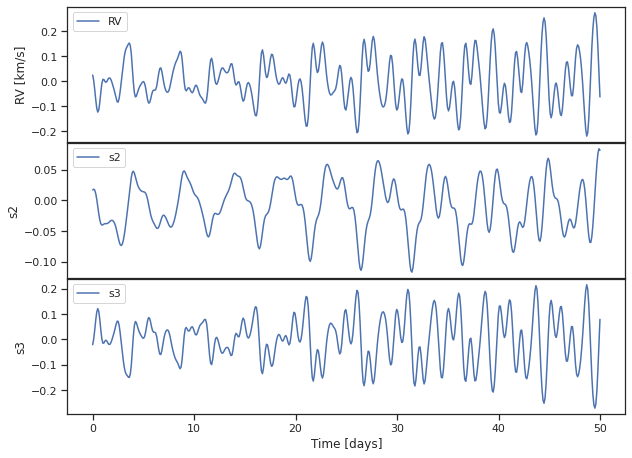

In [4]:
#Let us see how the 3 time-series look in the 50 day window we created
star.plot()

At this point we have a model of the three signals created following the same underlying GP $G(t)$. Now it is time to create data taken at the times $\mathbf{t}$ that we can specify. The times vector $\mathbf{t}$ can be optimised to follow schedule requirements of given targets at different observatories, but for this example, we will just create 50 random times between 0 and 50 days.

In [5]:
#Create the random observation times
t = np.random.uniform(0,50,50)

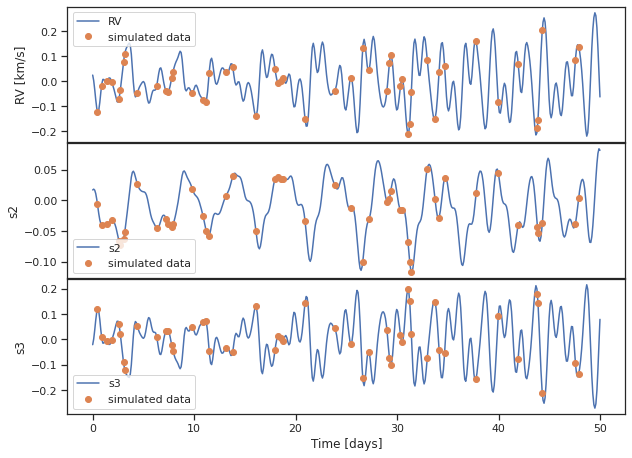

In [6]:
#Let us create the data at times t
star.create_data(t=t)
#Let us plot where our data points are
star.plot()

The previous plot shows the positions at which we have created our observations. We still need to add some white noise to make the situation more realistic. We do this by passing an error bar for each time-series that we have created. We will add an error bar for 0.001 for $S_1$ (RV), 0.005 for $S_2$, and 0.10 for $S_3$  as `err=[0.001,0.005,0.010]`.

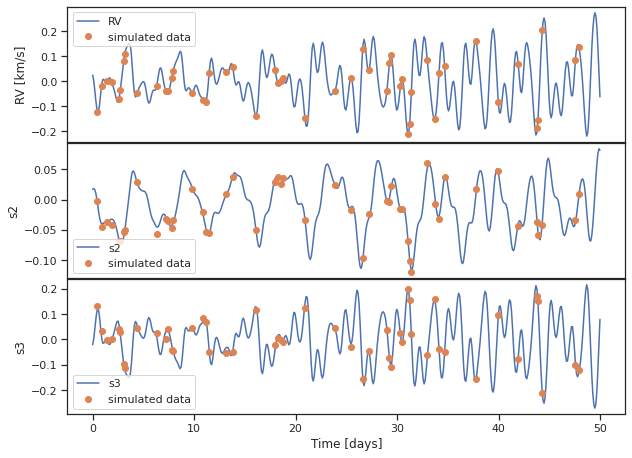

In [7]:
#The input vector err has to have one white noise term per each time-series
star.add_white_noise(err=[0.001,0.005,0.010])
star.plot()

### Save the file as requested by pyaneti

In [8]:
fname = 'data_3mdgp.dat'
star.save_data(fname)